In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('df_1.csv')
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,352.0,175.5,101.757883,0.0,87.75,175.5,263.25,351.0


1. determine which method of attack finds the data more frequently.

<AxesSubplot:>

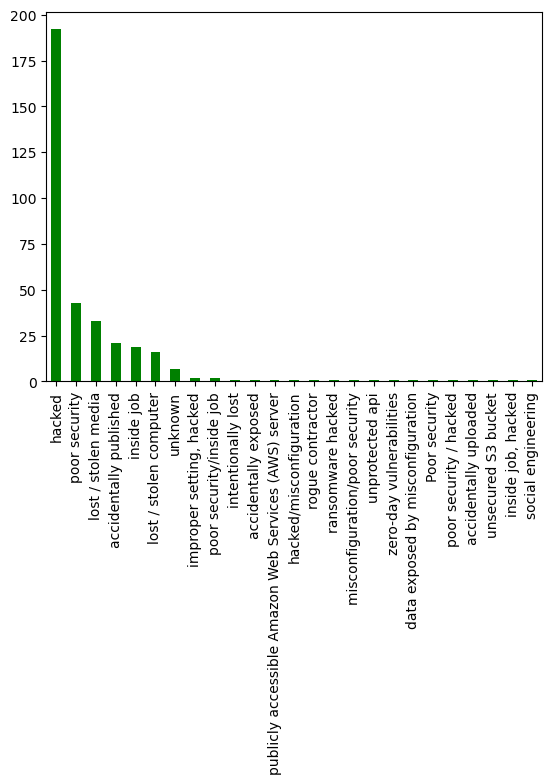

In [4]:
df['Method'].value_counts().plot(kind='bar',color='green')

In [5]:
for i in df['Year'].value_counts().index:
    print(i,df['Year'].value_counts()[i])

2011 34
2020 31
2019 30
2015 28
2013 28
2018 26
2014 25
2012 23
2016 22
2010 19
2008 16
2021 13
2009 13
2007 12
2017 9
2006 7
2005 6
2022 5
2004 2
2019-2020 1
2018-2019 1
2014 and 2015 1


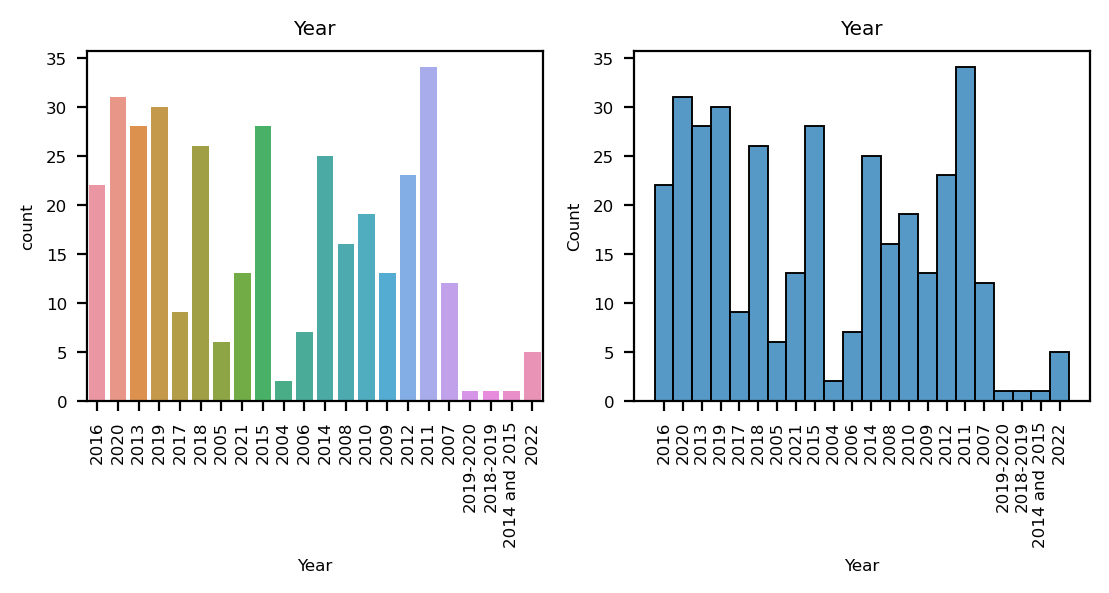

In [6]:
def plot_year(df):
    plt.figure(figsize=(10,5),dpi=200,facecolor='w',edgecolor='k')
    plt.rcParams['font.size']=6
    plt.subplot(2,3,1)
    plt.title("Year")
    sns.countplot(df['Year'])
    plt.xticks(rotation=90)
    plt.subplot(2,3,2)
    plt.title("Year")
    sns.histplot(df['Year'])
    plt.xticks(rotation=90)
    plt.show()
    
 

plot_year(df)

<AxesSubplot:>

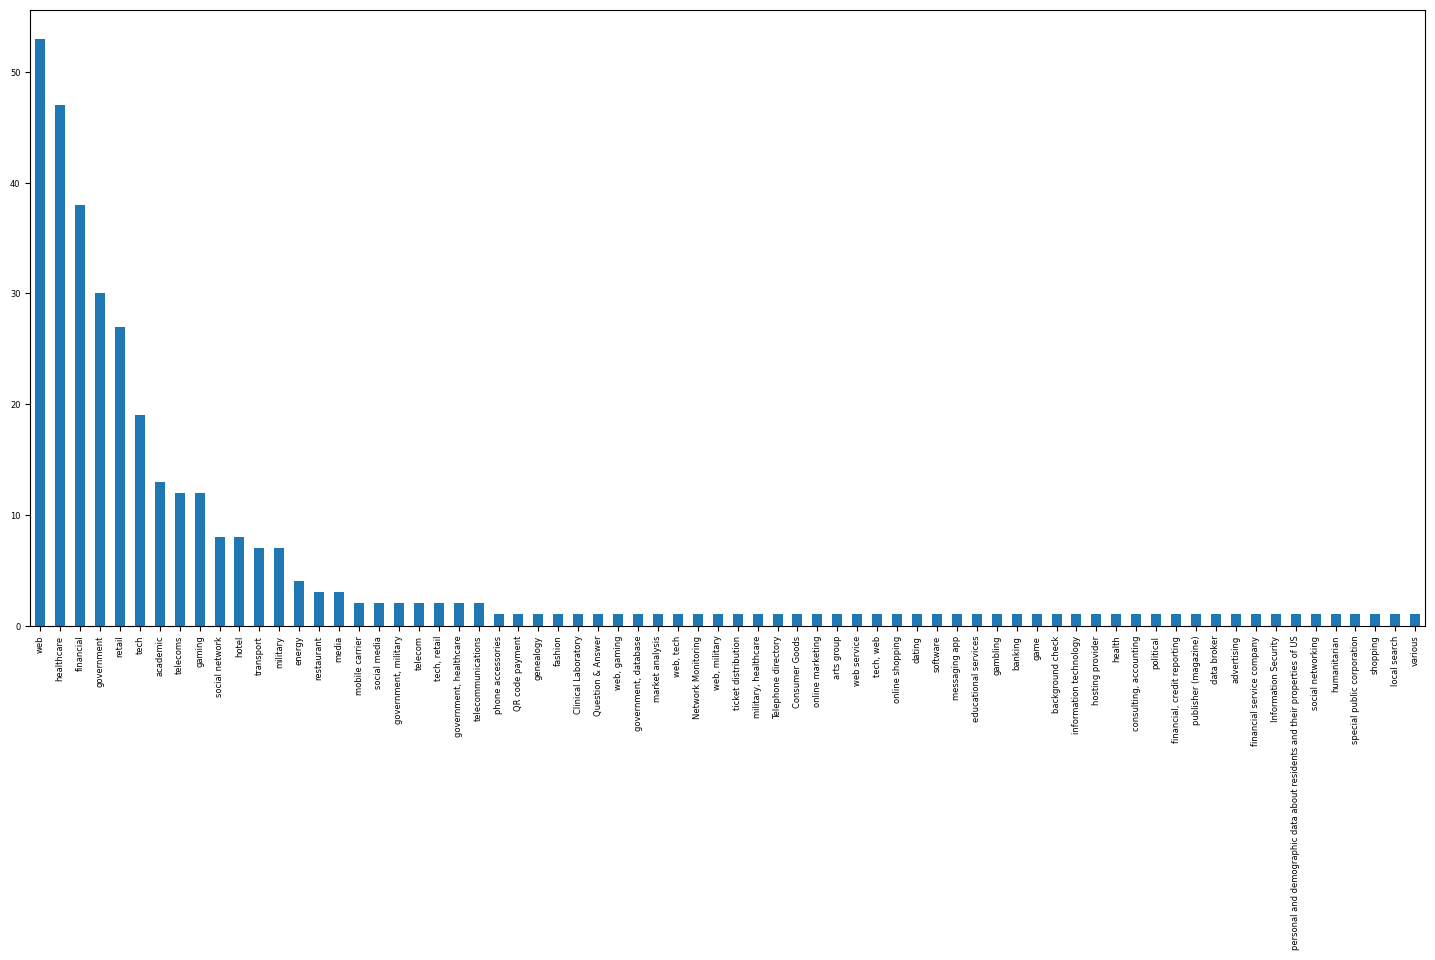

In [7]:
df['Organization type'].value_counts().plot(kind='bar',figsize=(18,8))

In [8]:
df.rename({'Organization type': 'Organization_type'}, axis=1, inplace=True)
df

,Unnamed: 0,Entity,Year,Records,Organization_type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]


In [9]:
health_care_df=df.loc[(df.Organization_type == 'healthcare') & (df.Method == 'hacked')]


In [10]:
health_care_df

,Unnamed: 0,Entity,Year,Records,Organization_type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
14,14,"Ankle & Foot Center of Tampa Bay, Inc.",2021,156000,healthcare,hacked,[25]
15,15,Anthem Inc.,2015,80000000,healthcare,hacked,[26][27]
55,55,CareFirst BlueCross Blue Shield - Maryland,2015,1100000,healthcare,hacked,[76]
68,68,Community Health Systems,2014,4500000,healthcare,hacked,[91]
73,73,Centers for Medicare & Medicaid Services,2018,75000,healthcare,hacked,[94]
107,107,Excellus BlueCross BlueShield,2015,10000000,healthcare,hacked,[135]
132,132,Grozio Chirurgija,2017,25000,healthcare,hacked,[173][174][175]
170,170,LifeLabs,2019,15000000,healthcare,hacked,[225]
181,181,Medical Informatics Engineering,2015,3900000,healthcare,hacked,[237]


In [11]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [12]:
df.dropna(subset=['Records'], inplace=True)

In [13]:
df.isna().sum()

Id                   0
Entity               0
Year                 0
Records              0
Organization_type    0
Method               1
Sources              2
dtype: int64

In [14]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

,Id,Entity,Year,Records,Organization_type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]


In [16]:
df.dropna(subset=['Records'], inplace=True)

In [17]:


df.reset_index(drop=True, inplace=True)



In [18]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str[:4]
df['Year'] = df['Year'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 350 non-null    int64 
 1   Entity             350 non-null    object
 2   Year               350 non-null    int32 
 3   Records            350 non-null    object
 4   Organization_type  350 non-null    object
 5   Method             349 non-null    object
 6   Sources            348 non-null    object
dtypes: int32(1), int64(1), object(5)
memory usage: 17.9+ KB


In [22]:
le = LabelEncoder()

df['Entity'] = le.fit_transform(df['Entity'])
df['Organization_type'] = le.fit_transform(df['Organization_type'])
df['Method'] = le.fit_transform(df['Method'])
df['Sources'] = le.fit_transform(df['Sources'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 350 non-null    int64 
 1   Entity             350 non-null    int64 
 2   Year               350 non-null    int32 
 3   Records            350 non-null    object
 4   Organization_type  350 non-null    int32 
 5   Method             350 non-null    int32 
 6   Sources            350 non-null    int32 
dtypes: int32(4), int64(2), object(1)
memory usage: 13.8+ KB


In [25]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Records', ylabel='Year'>

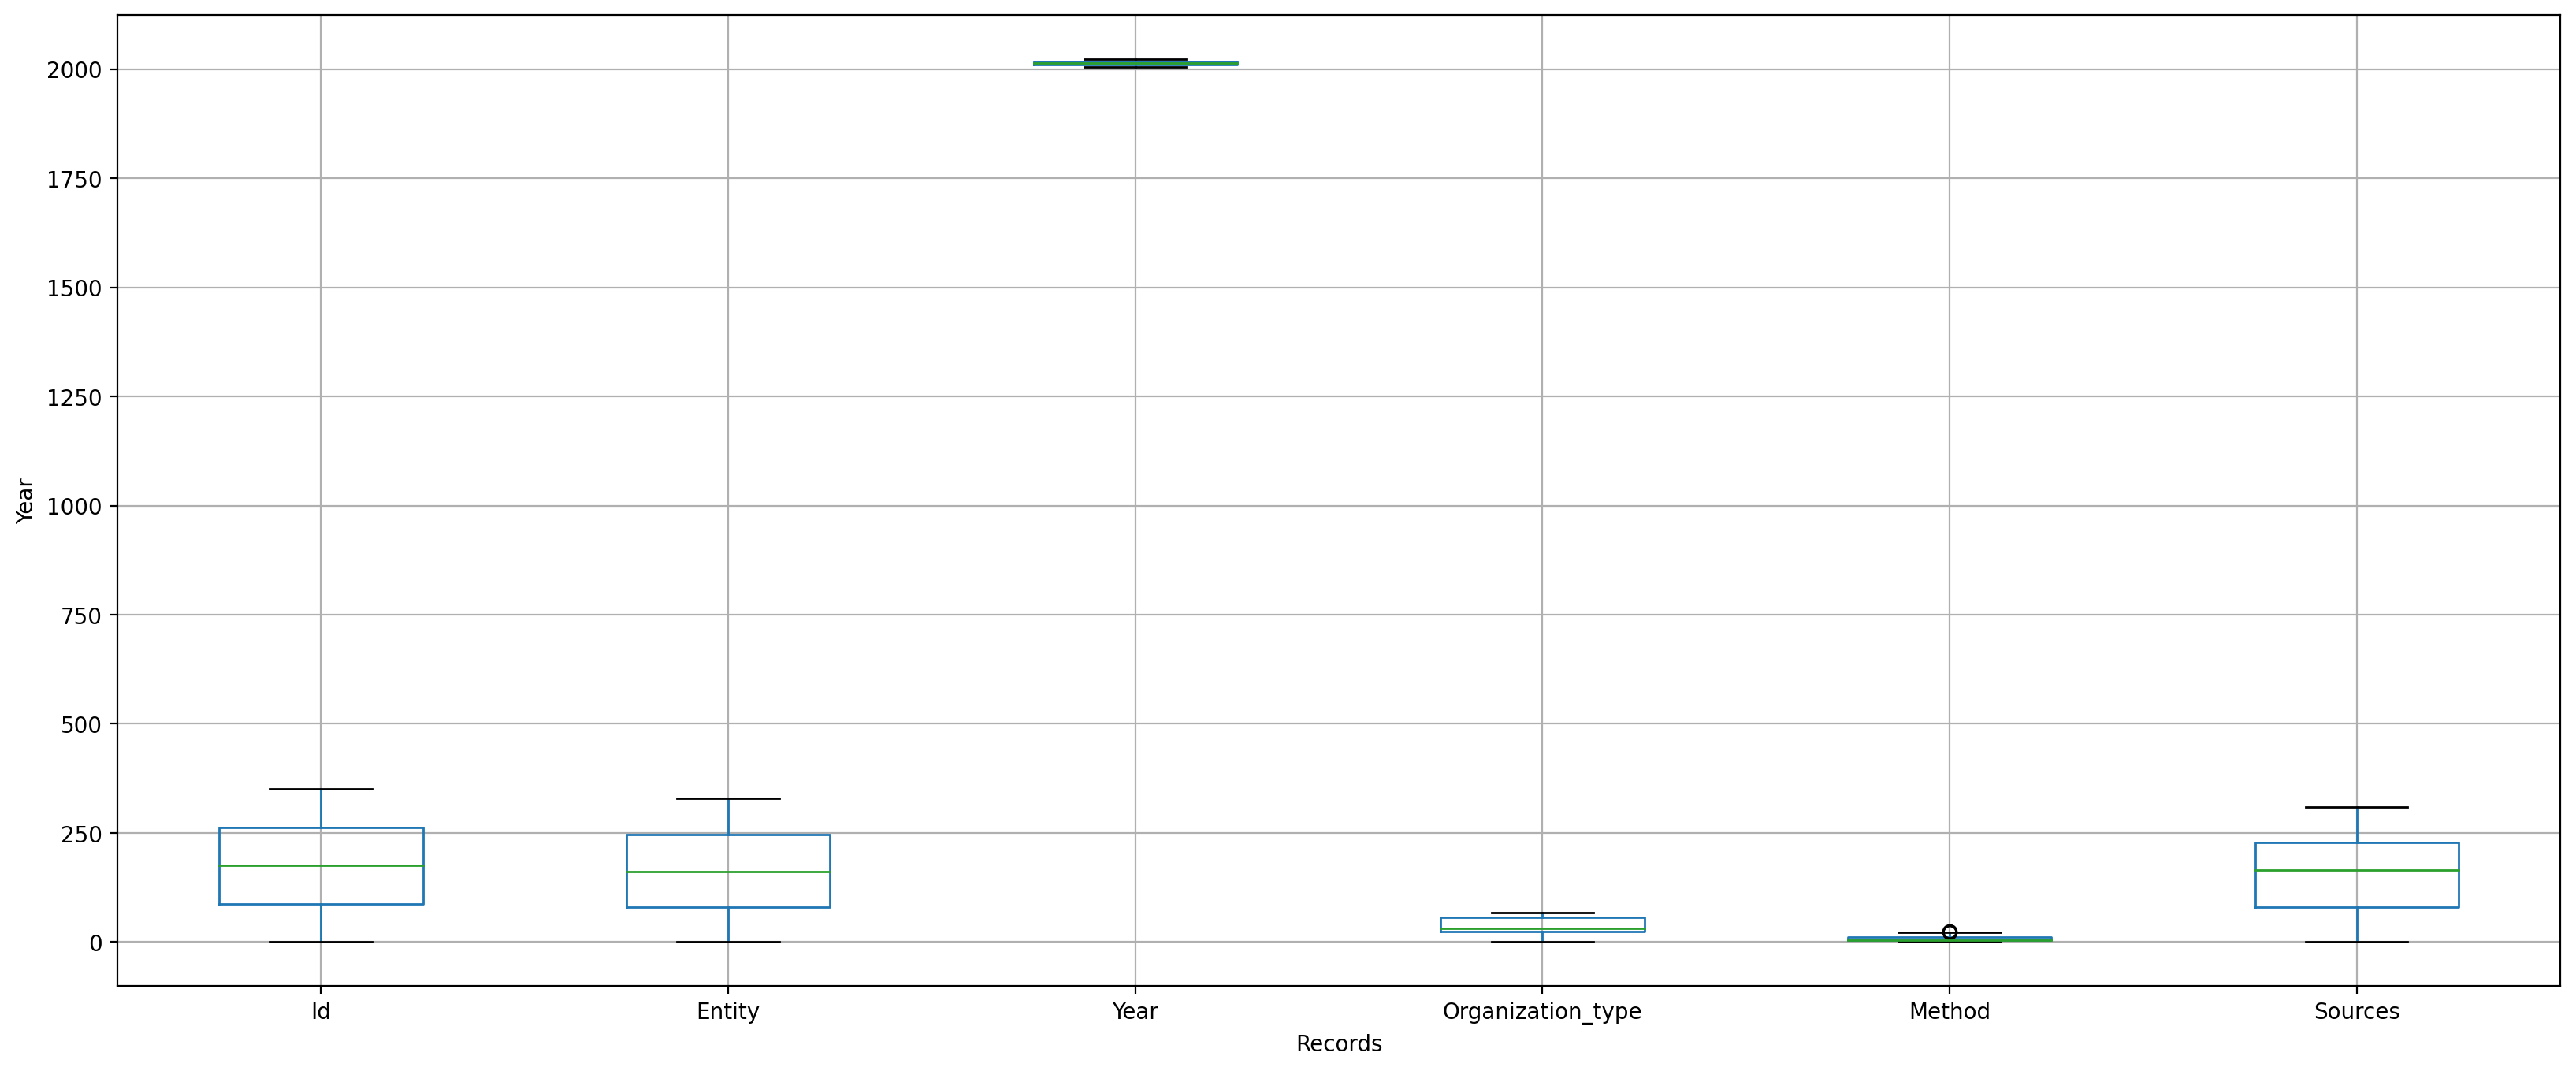

In [26]:
plt.figure(figsize=(20,8),dpi=200,facecolor='w',edgecolor='k')
plt.rcParams['font.size'] = 10
plt.xlabel('Records')
plt.ylabel('Year')
df.boxplot(figsize=(20,8))

<AxesSubplot:>

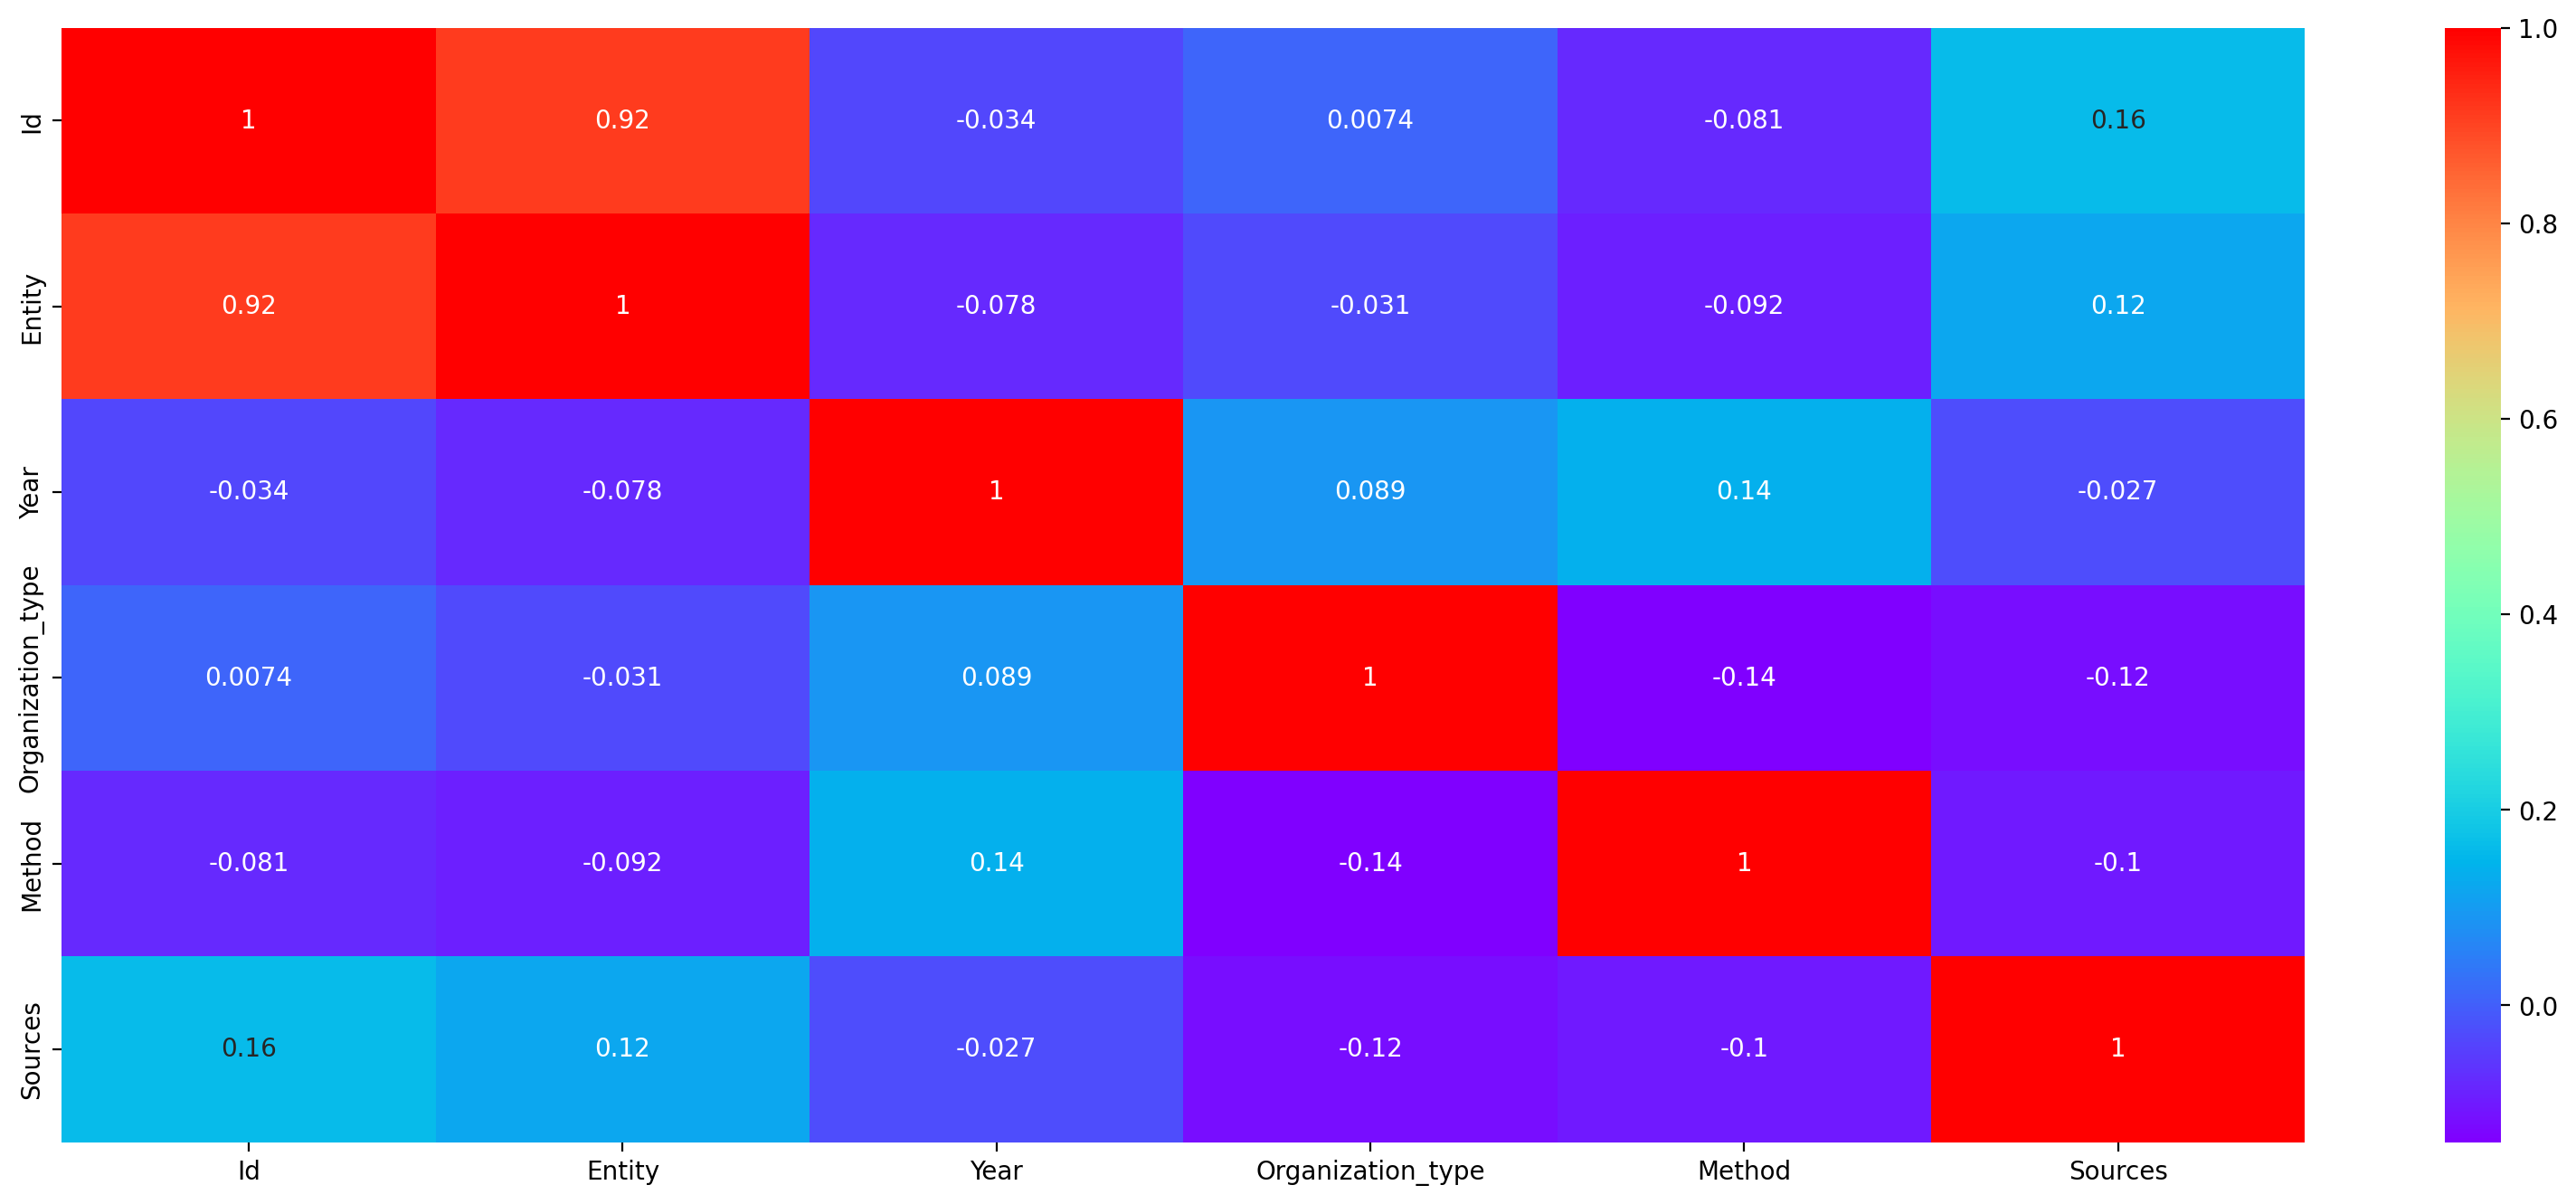

In [28]:
plt.figure(figsize=(20,8),dpi=200,facecolor='w',edgecolor='k')
plt.rcParams['font.size'] = 10
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Entity'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Organization_type'}>],
       [<AxesSubplot:title={'center':'Method'}>,
        <AxesSubplot:title={'center':'Sources'}>]], dtype=object)

<Figure size 4000x1600 with 0 Axes>

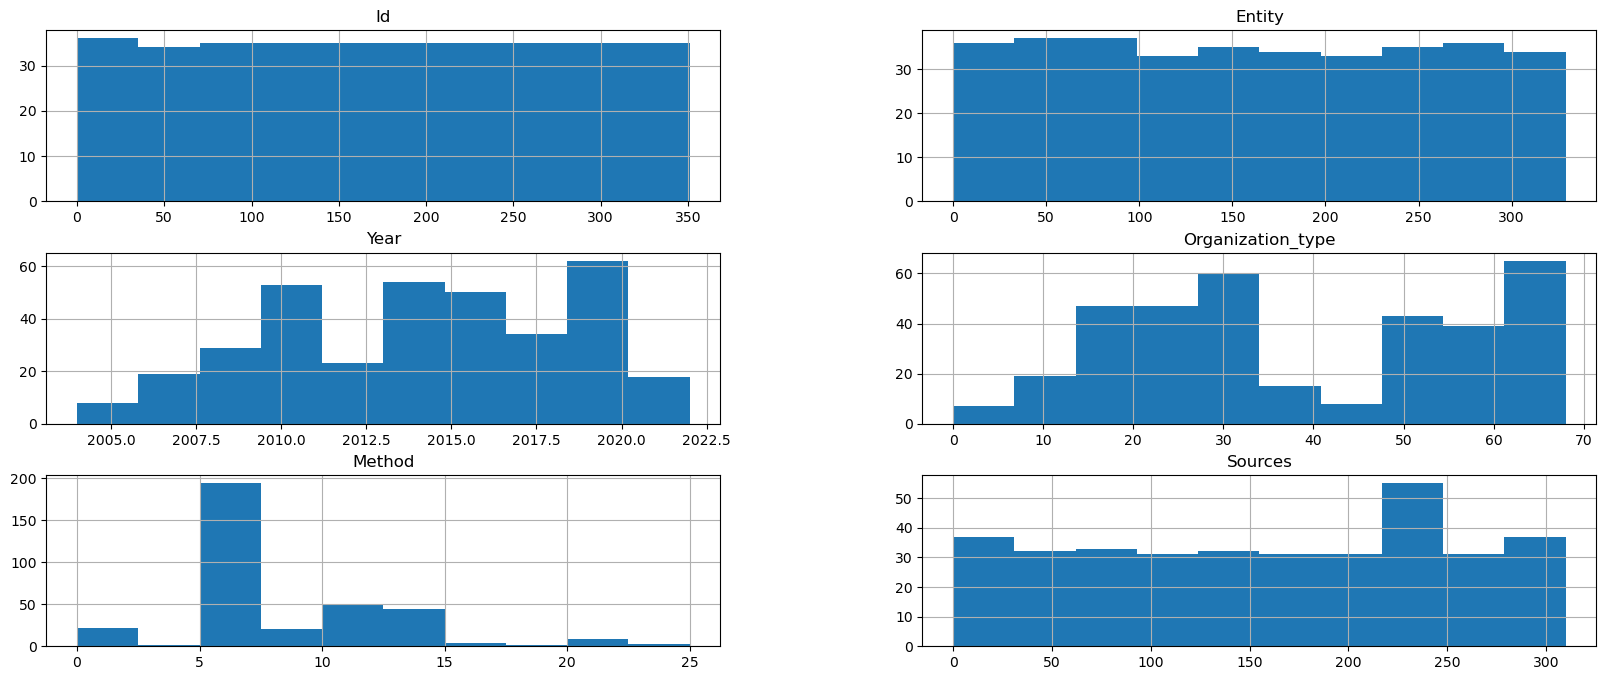

In [29]:
plt.figure(figsize=(20,8),dpi=200,facecolor='w',edgecolor='k')
plt.rcParams['font.size'] = 10
df.hist(figsize=(20,8))